In [3]:
import pandas as pd
import random
import os
import shutil

random.sample(range(1,9),27)

ValueError: Sample larger than population or is negative

[2, 3, 5, 6, 4, 8, 1, 7, 6, 3, 7, 4, 1, 8, 5, 2, 5, 7, 8, 2, 3, 6, 4, 1, 7, 1, 5]


(array([4., 3., 3., 0., 3., 4., 0., 3., 4., 3.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

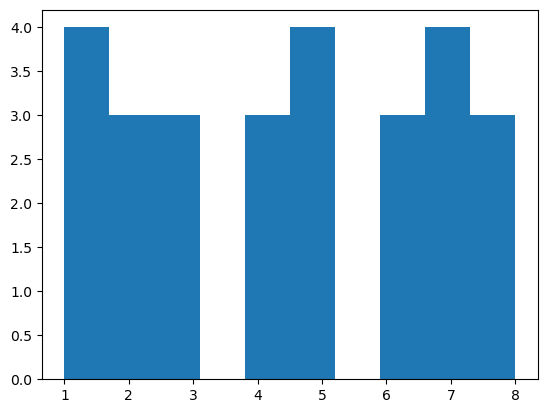

In [15]:
random_horizons = generate_random_numbers(8, 27)
print(random_horizons)
import matplotlib.pyplot as plt
plt.hist(random_horizons)


In [8]:
import pandas as pd
import random
import os
import shutil


import random

def generate_random_numbers(num, numLen):
    while True:
        # Generate three sets of randomly permuted numbers from 1 to 5
        if numLen==14:
            set1 = random.sample(range(1, num+1), num)
            set2 = random.sample(range(1, num+1), num)
            set3 = random.sample(range(1, num+1), num)
                    # Concatenate the three sets
            concatenated_numbers = set1 + set2 + set3
        else:
            set1 = random.sample(range(1, num+1), num)
            set2 = random.sample(range(1, num+1), num)
            set3 = random.sample(range(1, num+1), num)
            set4 = random.sample(range(1, num+1), num)
            concatenated_numbers = set1 + set2 + set3 + set4



        # Drop the last number to make it a 14-digit number
        # Make sure that the length of sequence is numLen
        concatenated_numbers = concatenated_numbers[:numLen]

        # Check for consecutive identical numbers
        consecutive_check = any(
            abs(concatenated_numbers[i] - concatenated_numbers[i+1]) == 1 and
            abs(concatenated_numbers[i+1] - concatenated_numbers[i+2]) == 1
            for i in range(numLen-2)
        )

        # Check for repetitions of identical numbers
        repetitive_check = any(
            concatenated_numbers[i] == concatenated_numbers[i+1]
            for i in range(numLen-1)
        )

        if not consecutive_check and not repetitive_check:
            return concatenated_numbers

In [18]:
def generate_tgt_file(seq_type, block):
    # Set constant values
    iti_value = 5000
    stim_time_value = 15000
    prep_time_value = 3000
    feedback_value = 1

    # Generate 27 trials
    data = []
    random_horizons = generate_random_numbers(8, 27)
    for k in range(27):
        random_numbers = generate_random_numbers(5, 14)

        # Create a row of data
        row = [seq_type, feedback_value] + random_numbers + [''.join(map(str, random_numbers)), iti_value, random_horizons[k], stim_time_value, prep_time_value]

        # Append the row to the data list
        data.append(row)

    # Create a DataFrame using pandas
    columns = ["seqType", "feedback"] + [f"press{i}" for i in range(1, 15)] + ["cueP", "iti", "Horizon", "StimTime", "PrepTime"]
    df = pd.DataFrame(data, columns=columns)

    # Save the DataFrame to a CSV file with .tgt extension
    filename = f"ssh_s{seq_type}_b{block}.tgt"
    df.to_csv(filename, sep='\t',  index=False)


#from google.colab import files

# Specify the file path
for seq_type in range(1,3):
    for block in range(1, 41):
        generate_tgt_file(seq_type, block)
#            file_path =  f"ssh_s{seq_type}_h{horizon}_b{block}.tgt"
        # Download the file
#           files.download(file_path)